# <div style="color:white;display:fill;border-radius:5px;background-color:#0d427a;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;margin:0;font-size:110%"><b></b> Machine Learning - Molecules 🔬</p></div>

<center ><img src='https://raw.githubusercontent.com/fukashi-hatake/kaggle_notebooks/main/images/Branches-of-Chemistry.jpg' width="50%" height="50%"> 

> Recently I attended AI competation and our task was to identify active molecules of COVID from normal molecules. Here are some tips that I learned from this challenge! 

### <font color="#0d427a"> What is SMILES? </font> 


#### SMILES (Simplified Molecular Input Line Entry System) 

> This is the simplest way to reflect a molecule. The idea behind is to use simple line notations for chemical formulas that are based on some rules. Atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. Single bonds are not displayed; for double, triple and quadruple bonds we shall use '=', '#', '$' respectively. Atoms that are bonded must stand nearby. Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms. Aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively. To represent side chains of atomic gpoups branches are used.

#### <font color="#0d427a"> Library for working with SMILES </font>  

> rdkit - https://www.rdkit.org/ 

In [1]:
!pip install rdkit-pypi

     |████████████████████████████████| 22.7 MB 497 kB/s            


In [2]:
from rdkit.Chem import Draw   
from rdkit import Chem 
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps

#### <font color="#0d427a"> Examples </font>  

* Example for inactive molecules: <font color='blue'>"CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl"</font>
* Example for active molecules: <font color='red'>"CN1CCC(CNc2ccc3ncc(-c4cccc(OC(F)(F)F)c4)n3n2)CC1"</font>

In [3]:
inactive_mol_smiles = "COc1ccc2[nH]cc(CCN)c2c1"
active_mol_smiles = "CN1CCC(CNc2ccc3ncc(-c4cccc(OC(F)(F)F)c4)n3n2)CC1"

#Method transforms smiles strings to mol rdkit object  
inactive_mol = Chem.MolFromSmiles(inactive_mol_smiles) 
active_mol= Chem.MolFromSmiles(active_mol_smiles) 

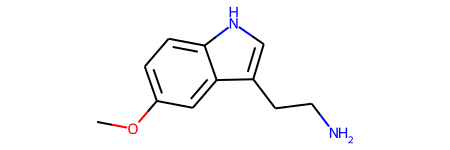

In [4]:
inactive_mol

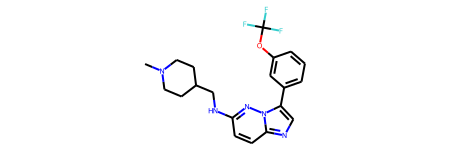

In [5]:
active_mol

In [6]:
c_patt = Chem.MolFromSmiles('C') ## it find this elements 

# Now let's implement GetSubstructMatches() method 
inactive_mol.GetSubstructMatches(c_patt)

((0,), (2,), (3,), (4,), (5,), (7,), (8,), (9,), (10,), (12,), (13,))

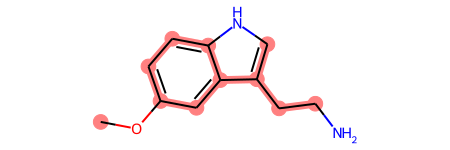

In [7]:
inactive_mol

In [8]:
c_patt = Chem.MolFromSmiles('F') ## it find this elements 

# Now let's implement GetSubstructMatches() method 
active_mol.GetSubstructMatches(c_patt)

((21,), (22,), (23,))

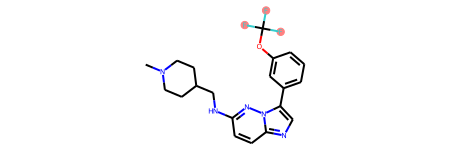

In [9]:
active_mol

#### <font color="#0d427a"> Numbers of atoms

In [10]:
### You can count the number of atoms, heavy atoms 

num_atoms = active_mol.GetNumAtoms()
num_atoms

29

In [11]:
num_heavy_atoms = active_mol.GetNumHeavyAtoms()
num_heavy_atoms

29

#### <font color="#0d427a"> Numbers of the most common atoms

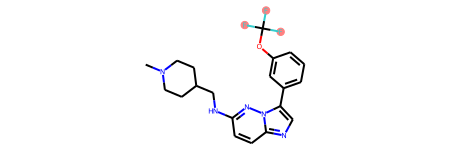

In [12]:
active_mol

In [13]:
## Common atoms: 'C','O', 'N', 'Cl', 'F', 'S'

number_of_N = len(active_mol.GetSubstructMatches(Chem.MolFromSmiles('N'))) 
number_of_N

5

In [14]:
number_of_F = len(active_mol.GetSubstructMatches(Chem.MolFromSmiles('F'))) 
number_of_F

3

#### <font color="#0d427a">  Ring information

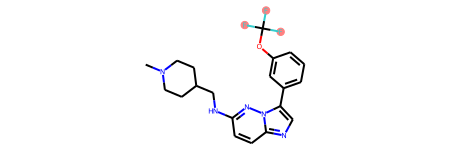

In [15]:
active_mol

In [16]:
## You can count the number of rings 

active_mol.GetRingInfo().NumAtomRings(2)  # number of 2 rings 

1

In [17]:
active_mol.GetRingInfo().NumAtomRings(5)  # number of 1 rings 

0

#### <font color="#0d427a"> Gasteiger Charge 

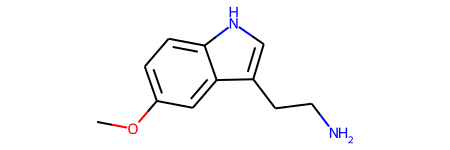

In [18]:
m = Chem.MolFromSmiles(inactive_mol_smiles)
AllChem.ComputeGasteigerCharges(m)
m  

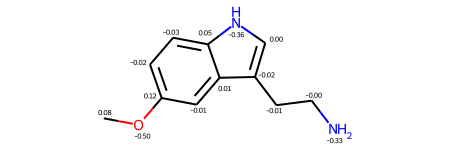

In [19]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2

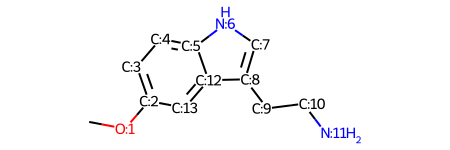

In [20]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol_with_atom_index(m)

#### <font color="#0d427a"> Descriptors
    
    > rdkit.Chem.Descriptors provides a number of general molecular descriptors that can also be used to featurize a molecule. Most of the descriptors are straightforward to use from Python.

In [21]:
Descriptors.TPSA(active_mol)

54.69

In [22]:
Descriptors.ExactMolWt(active_mol)

405.17764498400004

In [23]:
Descriptors.NumValenceElectrons(active_mol)

154

In [24]:
Descriptors.NumHeteroatoms(active_mol)

9

### <font color="#0d427a"> Image 

> I reccomend you to generate image of molecules and train image classifier 

In [25]:
### You can save to image as follow 
Draw.MolToFile(active_mol, "active_mol.png")  

#### <font color="#0d427a"> You can also generate images with charges  

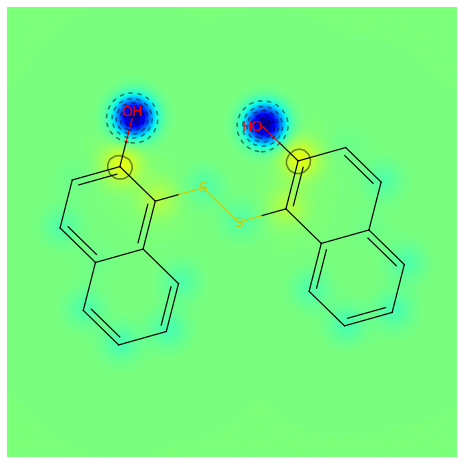

In [26]:
mol = Chem.MolFromSmiles('Oc1ccc2ccccc2c1SSc1c(O)ccc2ccccc12') 
AllChem.ComputeGasteigerCharges(mol) 

contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())] 

fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

## <center> <font color="#0d427a"> Thank you for reading! 